In [1]:
import os
from random import choice
import re

import jieba.analyse
import jieba.posseg

import gensim
import lda

from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

import pandas as pd
import numpy as np
from collections import Counter

In [2]:
lyrics = ''

In [3]:
root_dir = 'songlist/'
list = os.listdir(root_dir)
for d in list:
    path = os.path.join(root_dir,d)
    lyric = ''
    with open(path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            lyric = lyric + '，'.join(line.strip().split(' ')) 
            if lyric[-1] == '。' or lyric[-1] == '，':
                continue
            lyric = lyric + '。'
        lyrics = lyrics + lyric

In [4]:
lyrics

'不知不觉得，我一个人又到了这里。我冷冷的微笑，看你的脸庞。不知不觉的，我还是不懂，你说的是什么。你还是这样的，无知的变了。你说你不知道，你的坚强又丢到了哪里。我还是看着你，美丽的谎言。你说你不知道，你不再回答我问的问题。我还是看着你，美丽的谎言。不知不觉得，我一个人又到了这里。我冷冷的微笑，看你的脸庞。不知不觉的，我还是不懂，你说的是什么。你还是这样的，无知的变了。你说你不知道，你的坚强又丢到了哪里。我还是看着你，美丽的谎言。你说你不知道，你不再回答我问的问题。我还是看着你，美丽的谎言。不知不觉的，不知不觉的。一个人也没什么大不了的。虽然我一个人，至少我现在还活着。你的晚安，是下意识的恻隐。我留至夜深，治疗失眠梦呓。那封手写信，留在行李箱底。来不及，赋予它旅途的意义。若一切，都已云烟成雨。我能否，变成淤泥。再一次，沾染你。若生命，如过场电影。Oh让我再一次，甜梦里惊醒。我多想再见你。哪怕匆匆一眼就别离。路灯下昏黄的剪影。越走越漫长的林径。我多想再见你。至少玩笑话还能说起。街巷初次落叶的秋分。渐行渐远去的我们。若一切，都已云烟成雨。我能否，变成淤泥。再一次，沾染你。若生命，如过场电影。Oh让我再一次，甜梦里惊醒。我多想再见你。哪怕匆匆一眼就别离。路灯下昏黄的剪影。越走越漫长的林径。我多想再见你。至少玩笑话还能说起。街巷初次落叶的秋分。渐行渐远去的我们。站台，汽笛响起。想念是你的声音。我们提着过去，走入人群。寻找着一个位置，安放自己。我多想再见你。哪怕匆匆一眼就别离。路灯下昏黄的剪影。越走越漫长的林径。我多想再见你。至少玩笑话还能说起。街巷初次落叶的秋分。渐行渐远去的我们。主唱：红鼻子小黑。制作人：黎偌天。监制：李纤橙。如果有一天我能够拥有一个大果园。我愿放下所有追求做个农夫去种田。每一个早晨我耕耘在绿野田园。每一个黄昏我守望在乡间的麦田。我会把忧虑都融化在夕阳里。让孤独的心等待秋收的欢喜。哦如果那个时候我身边没有女朋友。我不介意谁会来给我一个周末的问候。哦如果那个时候我依然牵着她的手。我们会幸福的坐上树枝头。如果有一天我能够拥有一条渔船。我愿放下所有执着做个渔夫住在海边。每一个早晨我航行在晨曦的海面。每一个黄昏我遥望在无际的海云间。我会把思绪都消失在波涛里。让澎湃的心等待风雨后的平息。哦如果那个时候我身边没有女朋友。我不介意谁会来给我一个周末的问候。哦如果那个时候我

In [5]:
STOP_WORDS = set([w.strip() for w in open("stopwords.txt").readlines()])

In [6]:
X,Y = ['\u4e00','\u9fa5']
tag = jieba.lcut(lyrics.strip(),cut_all = False)
tag = [ i for i in tag if len(i) >= 2 and X<=i<=Y and i not in STOP_WORDS ]
tag_str = [' '.join(tag)]

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.889 seconds.
Prefix dict has been built succesfully.


In [7]:
vectorizer = CountVectorizer()
cif = vectorizer.fit_transform(tag_str)
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(cif)
word = vectorizer.get_feature_names()
word = np.array(word)  
weight = tfidf.toarray()
word_index = np.argsort(-weight)
word = word[word_index]

In [8]:
weight = weight[0][word_index]

keywords = []
for i in range(50):
    keywords.append([word[0][i],weight[0][i]])

In [9]:
dic = {}

for item in keywords:
    if item[0] not in STOP_WORDS:
        dic[item[0]] = item[1]

In [10]:
def my_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return choice(["rgb(94,38,18)", "rgb(41,36,33)", "rgb(128,128,105)", "rgb(112,128,105)"])

def draw_cloud(word_freq):  
    wc = WordCloud(
        font_path='MFSongHe_Noncommercial-Regular.ttf',
        background_color="white",  
                   max_words=30,    
                   max_font_size=80, 
                   random_state=42,
                   )

    wc.generate_from_frequencies(word_freq)

    plt.figure()

    plt.imshow(wc.recolor(color_func=my_color_func), interpolation='bilinear')

    plt.axis("off")
    plt.show()

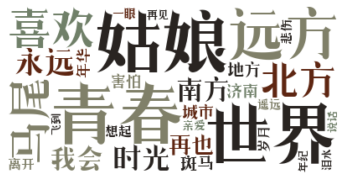

In [11]:
draw_cloud(dic)

In [12]:
keywords = jieba.analyse.textrank(lyrics, topK=50, withWeight=True, allowPOS=("a", "v", "x", "n", "an", "vn", "nz", "nt", "nr"))

In [13]:
dic = {}

for item in keywords:
    if item[0] not in STOP_WORDS:
        dic[item[0]] = item[1]

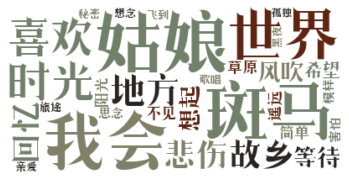

In [14]:
draw_cloud(dic)

In [16]:
model = gensim.models.Word2Vec.load('word2vec_wx')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [17]:
def predict_proba(oword, iword):
    iword_vec = model[iword]
    oword = model.wv.vocab[oword]
    oword_l = model.trainables.syn1[oword.point].T
    dot = np.dot(iword_vec, oword_l)
    lprob = -sum(np.logaddexp(0, -dot) + oword.code*dot) 
    return lprob

In [18]:
def extract_keywords(s):
    s = [w for w in s if w in model]
    ws = {w:sum([predict_proba(u, w) for u in s]) for w in s}
    return Counter(ws).most_common(50)

In [20]:
dic = extract_keywords(jieba.cut(lyrics))

/home/eloise/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/home/eloise/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


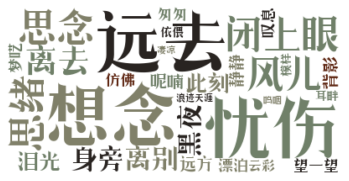

In [22]:
dics = {}
for x in dic:
    dics[x[0]] = x[1]
    
draw_cloud(dics)

In [23]:
def get_lda_input(corpus):
    corpus = [" ".join(corpus)]
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus)
    return X.toarray(), vectorizer

In [24]:
def lda_train(weight, vectorizer):
    model = lda.LDA(n_topics=10, n_iter=500, random_state=1)
    model.fit(weight)

    doc_num = len(weight)
    topic_word = model.topic_word_
    vocab = vectorizer.get_feature_names()

    n_top_words = 5
    for i, topic_dist in enumerate(topic_word):
        topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words + 1):-1]
        print('Topic {}: {}'.format(i, ' '.join(topic_words)))

In [25]:
def is_fine_word(word, min_length=2):
    rule = re.compile(r"^[\u4e00-\u9fa5]+$")
    if len(word) >= min_length and word not in STOP_WORDS and re.search(rule, word):
        return True
    else:
        return False

seg = jieba.posseg.cut(lyrics)
res = []
for i in seg:
    if i.flag in ["a", "v", "x", "n", "an", "vn", "nz", "nt", "nr"] and is_fine_word(i.word):
        res.append(i.word)

In [26]:
weight, vectorizer = get_lda_input(res)
lda_train(weight, vectorizer)

INFO:lda:n_documents: 1
INFO:lda:vocab_size: 1543
INFO:lda:n_words: 3468
INFO:lda:n_topics: 10
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -40829
INFO:lda:<10> log likelihood: -31616
INFO:lda:<20> log likelihood: -31562
INFO:lda:<30> log likelihood: -31502
INFO:lda:<40> log likelihood: -31524
INFO:lda:<50> log likelihood: -31560
INFO:lda:<60> log likelihood: -31450
INFO:lda:<70> log likelihood: -31597
INFO:lda:<80> log likelihood: -31543
INFO:lda:<90> log likelihood: -31493
INFO:lda:<100> log likelihood: -31431
INFO:lda:<110> log likelihood: -31469
INFO:lda:<120> log likelihood: -31587
INFO:lda:<130> log likelihood: -31642
INFO:lda:<140> log likelihood: -31535
INFO:lda:<150> log likelihood: -31462
INFO:lda:<160> log likelihood: -31510
INFO:lda:<170> log likelihood: -31581
INFO:lda:<180> log likelihood: -31590
INFO:lda:<190> log likelihood: -31535
INFO:lda:<200> log likelihood: -31537
INFO:lda:<210> log likelihood: -31434
INFO:lda:<220> log likelihood: -31505
INFO:lda:<230> log li

Topic 0: 害怕 故乡 平淡 沉默 等待
Topic 1: 飞到 希望 简单 模样 流浪
Topic 2: 姑娘 世界 时光 遥远 泪水
Topic 3: 悲伤 木头 微笑 总会 不到
Topic 4: 斑马 离开 地方 故事 不想
Topic 5: 喜欢 我会 孤独 想要 温柔
Topic 6: 想起 草原 想念 歌唱 舍不得
Topic 7: 亲爱 秘密 爱人 回忆 孩子
Topic 8: 再见 兄弟 阳光 不见 凄凉
Topic 9: 说话 光亮 看着 风吹 忧伤
